In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10), encoding="latin1") # FRED v3
meta = pd.read_csv(r"./data/FRED/FRED3_Column_Definitions_2021.csv", usecols=["column_id", "name", "units"], index_col="column_id") # metadata for FRED v3 (column names, units etc.)
lookup = pd.read_csv(r"./data/plantlookup.csv", # https://github.com/traitecoevo/taxonlookup/releases/download/v1.1.5/plant_lookup.csv
                     low_memory=False, encoding="latin1", index_col=0) # https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/2041-210X.12517

In [5]:
# traits relevent to the root economics space (RES)

COLLABORATION_GRADIENT_TRAITS = [
    "F00679", # RD
    "F00727", # SRL
    "F00718", #	Specific root area (SRA)
    "F00104", # RCT
    "F00622", # Mycorrhiza_Fraction root length colonized by AM mycorrhizae
    "F00626", # Mycorrhiza_Fraction root length colonized by EM mycorrhizae
    "F00638", # Mycorrhiza_Fraction of root length
    "F00645"  # Mycorrhiza_Type_Data - not technically a root trait, just a relevant info
]

CONSERVATION_GRADIENT_TRAITS = [
    "F00709", # RTD
    "F00277", #	Root P content
    "F00261", # Root N content
    "F00358"  # Root lignin content
]

PLANT_TAXONOMY_ACCEPTED_COLUMNS = [
    "F01286", # Genus of plant according to The Plant List
    "F01287", # Species epithet of plant according to The Plant List
    "F01289", # Family of plant according to The Plant List
    "F01290" # Order of plant. For Angiosperms, this was determined using the Angiosperm Phylogeny Website (APW): Stevens, P. F. (2001 onwards). Angiosperm Phylogeny Website. 
             # Version 14, July 2017 [and more or less continuously updated since]. Online at http://www.mobot.org/MOBOT/research/APweb/. 
             # For other plant groups (Gymnosperms, Pteridophytes, and Bryophytes) this was determined first using APW, but in cases where there were discrepancies within APW,
             # and to maintain consistency in suffix nomenclature (i.e. all orders ending in “iales”), additional sources were used including the USDA Plants Database 
             # (https://plants.usda.gov/) and the Missouri Botanical Garden (http://www.missouribotanicalgarden.org/plant-science/plant-science/research/plant-identification.aspx).
]

ESSENTIAL_COLUMNS = [
    "F00018", # genus
    "F00019", # species
    "F00056" # root order
]

In [6]:
FRED_MISSPELT_GENERA = {
     "Aglaria": "Aglaia",
     "Aporusa": "Aporosa",
     "Artrocarpus": "Artocarpus",
     "Atrocarpus": "Artocarpus",
     "Brosimun": "Brosimum",
     "Diospyrus": "Diospyros",
     "Gletitsia": "Gleditsia",
     "Parakmeria": "Magnolia", # Parakmeria lotungensis is synonym for Magnolia lotungensis
     "Paramichelia": "Magnolia", # Paramichelia baillonii is synonym for Magnolia baillonii
     "Polyanthia": "Polyalthia",
     "Tabebuis": "Tabebuia",
     "Tabernamontana": "Tabernaemontana",
     "Tsoongiodendron": "Magnolia" # Tsoongiodendron odorum is synonym for Magnolia odora
}

LOOKUP_MISSING_GENERA = {
    "Carrizo": "Rutaceae",
    "Cuoropita": "Lecythidaceae",
    "Tsoongiodendron": "Magnoliaceae",
    "Schizonepeta": "Lamiaceae",
    "Schyzolobium": "Fabaceae",
    "Swingle": "Rutaceae",
    "x Citrofortunella": "Rutaceae" # Citrofortunella
}

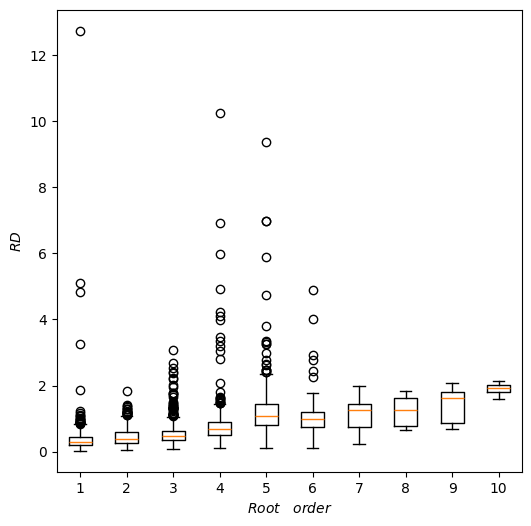

In [21]:
# root order and root diameter

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.boxplot([group.F00679 for (_, group) in fred.loc[:, ["F00679", "F00056"]].dropna().groupby("F00056")], label=[order for (order, _) in fred.loc[:, ["F00679", "F00056"]].dropna().groupby("F00056")])
axes.set_ylabel("$RD$")
axes.set_xlabel(r"$Root\hspace{1}order$")
plt.show()

# fred.loc[:, COLLABORATION_GRADIENT_TRAITS + CONSERVATION_GRADIENT_TRAITS + PLANT_TAXONOMY_ACCEPTED_COLUMNS + ESSENTIAL_COLUMNS].query("F00056.isin((1,2,3))").F00679